# 07-1 인공 신경망
##### 딥러닝과 인공 신경망 알고리즘을 이해하고 텐서플로를 사요해 간단한 인공 신경망 모델을 만들어봅니다.

- 럭키팩 이벤트를 의류로 다시 적용하려함
- 로지스틱 회귀 알고리즘 활용 예정

### 패션 MNIST
- 판매할 패션 상품의 데이턴는 아직 없음. 한빛 마켓에서 판매할 상품과 똑같은 데이터를 구할 수 있었음
- 7, 8장에서 패션 MNIST 데이터셋을 사용
- 이 데이터 셋은 10종류의 패션 아이템으로 구성
   - MNIST : 머신러닝에서 붓꽃 데이터셋이 유명한 것처럼 딥러닝에서는 MNIST 데이터셋이 유명
- 텐서플로(TensorFlow)에서 라이브러리 제공
  - 텐서플로 케라스(keras)패키지 임포트 후 패션 MNIST 데이터 다운로드

In [12]:
# !pip install tensorflow import keras
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- keras.datasets.fashioin_mnist 모듈 아래 load_data() 함수는 훈련 데이터와 테스트 데이터를 나누어 반환
- 이 데이터는 입력과 타깃의 쌍으로 구성되어 있음

In [13]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- 훈현 데이터는 6만개 이미지
  - 이미지는 28 X 28의 크기. 타깃도 6만개 원소가 있는 1차원 배열

In [7]:
# 테스트 세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


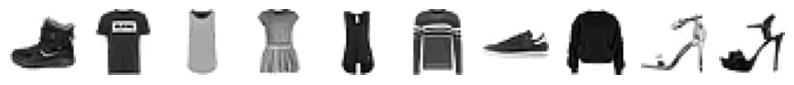

In [8]:
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

- 크기가 작고 흐릿
- 리스트 내포로 처음 10개 샘플의 타깃값으로 리스트로 만든 후 출력

In [9]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- MNIST 타깃은 0~9까지의 숫자 레이블로 구성
- 각 숫자 의미는 모르지만 마지막 2개 샘플이 같은 레이블(숫자 5)를 가지고 있음 (출력 이미지의 2개 샘플은 같은 종류의 신발인 듯)
- MNIST에 포함된 10개의 레이블의 의미는 아래와 같음
- 레이블 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- 패션아이템 티셔츠, 바지, 스웨터, 드레스, 코트, 샌달, 셔츠, 스니커즈, 가방 앵클 부츠

In [10]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- 0~9개까지 레이블마다 6,000개의 샘플이 들어있는 것을 확인

### 로지스틱 회귀로 패션 아이템 분류
- 샘플이 60,000개나 됨
- 데이터를 한번에 사용하여 모델 훈련하지 않고 샘플을 하나씩 꺼내서 모델을 훈련 -> 확률적 경사 하강법
- 4장에서 SGDClassifier 클래스의 loss 매개별수를 log로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델을 만들었습니다.
- 홍 선배가 바로 이 방법을 패션 러키백에 사용하고 있었습니다.
- 패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값을 가짐 -> 255로 나누어 0~1 사이의 값을 가짐
- reshape() 메서드로 2차원 배열을 1차원으로 변경

In [14]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

- 차원은 변하지 않고 원본 데이터의 두 번쨰, 세 번쨰 차원이 1차원으로 합쳐짐
- 변환된 train_scaled 크기 확인

In [12]:
print(train_scaled.shape)

(60000, 784)


- SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터를 교차 검증으로 성능 확인

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iter

0.8192833333333333


- SGDCLassfier의 반복 횟수(max_iter)를 5번으로 지정
- 반복 횟수를 늘려도 성능이 크게 향상되지는 않음
- 9번, 20번으로 테스트 해보자

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8301666666666666


/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iter

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iter

0.8436666666666668


/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- 만족할 만한 수준이 나오지 않음
- 잠시 4장에서 배웠던 로지스틱 회귀 공식을 떠올려보자

$$ z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f $$

- 위 식을 패션 MNIST 데이터에 맞게 변형

$$ z티셔츠 = w1 \times (픽셀1) + w2 \times (픽셀2) + ... + w784 \times (픽셀784) + b $$

- 총 784개의 픽셀(특성)이 있으므로 아주 긴 시이 만들어짐
- 가중치 개수도 많아지기 때문에 a, b, c 대신 w1, w2, w3와 같은 식으로 변경하고 마지막에 절편 b를 더함
- 두 번쨰 레이블인 바지에 대한 방정식도 써보자

$$ z바지 = w1' \times (픽셀1) + w2' \times (픽셀2) + ... + w784' \times (픽셀784) + b' $$

- 바지에 대한 출력을 계산하기 위해 가중치와 절편은 다른 값을 사용
- SGDClassifier 모델은 패션 MNIST 클래스를 잘 구분할 수 있도록 10개의 방정식에 대한 모델 파라미터(가중치와 절편)을 찾음
- 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음에는 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음
- 이제 인공 신경망을 활용하여 패션 아이템 분류 문제의 성능을 높일 수 있는지 확인해보자

### 인공 신경망
- 인공 신경망(artficial neural network, ANN)이 분류 문제에 잘 맞음
- 가장 기본적인 인공 신경망은 경사 하강법을 사용하는 로지스틱 회귀와 같음
- z_티셔츠, z_바지를 z<sub>1</sub>, z<sub>2</sub>와 같이 아래 첨자를 사용

![딥러닝 이미지 설명](./hongong-deep-learning.jpg "출력층설명")

- 책에서는 클래스가 총 10개이므로 z<sub>10</sub>까지 계산
- z<sub>1</sub> ~ z<sub>10</sub>을 계산하고 이를 바탕으로 클래스를 예측하기 떄문에 신경망의 최종 값을 만든다는 의미에서 출력층(output layer)이라고 함
- 인공 신경망에서 z 값을 계산하는 단위를 뉴런Uneuron)이라고 함. 뉴런에서 일어나는 일은 선형 계산이 전부임
  - 이제는 뉴런이라는 표현 대신에 유닛(unit)이라고 부르는 사람이 더 많아지고 있음
- 픽셀1, 픽셀2와 같은 값을 x<sub>1</sub>, x<sub>2</sub>와 같이 변경, 아래 첨자를 사용해 784번째 픽셀에 해당하는 x<sub>784</sub>까지 표현
- 인공 신경망은 x<sub>1</sub>~x<sub>784</sub>까지를 입력층(input layer)이라고 표현
- 입력층은 픽셀값 자체이고 특별한 계산을 수행하지 않음
- z1을 만들기 위해 픽셀1인 x<sub>1</sub>에 곱해지는 가중치는 w<sub>1,1</sub>이라고 쓰고 z<sub>2</sub>를 만들기 위해 픽셀1인 x1에 곱해지는 가중치는 w<sub>1,2</sub>이라고 표현
- 절편은 뉴런마다 하나씩이므로 순서대로 b<sub>1</sub>, b<sub>2</sub>와 같이 표현
- 매컬러-피츠 뉴런 : 1943년 워런 매컬러, 월터 피츠가 제안한 뉴런 모델(인공신경망) - 생물학적 뉴런에 영감을 얻음
  1. 생물학적 뉴런은 수상 돌기로부터 신호를 받아 세포체를 모음
  2. 신호가 임곗값에 도달하면 축삭 돌기를 통해 다른 세포에 신호 전달
- 딥러닝은 인공 신경망과 더의 동의어로 사용, 혹은 심층 신경망(deep neural network, DNN)을 딥러닝이라고도 부름. 심층 신경망은 여러 개의 층을 가진 인공 신경망
- 인공 신경망 모델을 만드는 최신 라이브러리들은 SGDClassifier에는 없는 몇 가지 기능을 제공

### 텐서플로와 케라스
- 텐서플로 : 2015.11월 오픈소스로 공개한 딥러닝 라이브러리(구글)

```python
import tensorflow as tf
```

- 케라스 : 텐서플로의 고수준 API (2015.03, 프랑소와 솔레)
- 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점은 GPU를 사용하는 것 (벡터와 행렬 연산에 최적화)
- 케라스 라이브러리는 직접 GPU 연산을 수행하지 않고 GPU 연산을 수행하는 다른 라이브버리를 백엔드로 사용
- 케라스의 백엔드 : 텐서플로, 씨아노, CNTK 등
  - 멀티-백엔드 케라스라고도 함
- 다양한 백엔드를 지원했던 멀티-백엔드 케라스는 2.3.1 버전 이후 개발 중지
- 케라스 import
```python
from tensorflow import keras
```

### 인공 신경망으로 모델 만들기
- train_scaled, train_target 사용
- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용
  - 딥러닝 분야 데이터셋은 충분히 커 검증 점수가 안정적
  - 교차 검증 수행에 들어가는 훈련 시간이 너무 오래 걸림

In [18]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 패션 MNIST 데이터는 이미 잘 섞인 데이터라서 train_test_split() 함수 사용 않고 뒤에서 10,000개 정도 샘플을 덜어 검증 세트로 만들어도 됨
- 훈련 세트에서 20%를 검증 세트로 덜어냄. 크기를 알아보자

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [15]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


- 6만개 중 만 이천개가 검증 세트로 분리됨
- 훈련 세트(train_scaled, train_target)로 모델을 만들고 검증 세트(val_scaled, val_target)로 모델 평가
- 아래 그림의 오른쪽에 놓인 층을 만들어보자. 10개의 패션 아이템 분류를 위해 10개의 뉴런으로 구성
![10개의뉴런설명](./ann-353-1.jpg)

- 케라스의 레이어(keras.layers) 패키지 안에는 다양한 층이 있음
- 가장 기본이 되는 층은 밀집층(dense layer)
  - 아래 그림에서 왼쪽 784개 픽셀과 10개의 뉴런이 모두 연결된 층 (784 x 10 = 7,840)
![밀집층설명](./ann-353-2.jpg)

이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer)라고 부름

- 케라스의 Dense 클래스를 사용해 밀집층 만들어보자 (매개변수 : 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기)

In [7]:
from tensorflow import keras
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

- 매개변수 설명
  - 뉴런 개수 10개 지정 (10개의 패션 아이템 분류)
  - 다중분류이므로 softmax 함수 사용(이진 분류 : sigmoid)
  - 입력값의 크기 (튜플로 지정)
- 이제 신경망 모델을 만들어보자 

In [8]:
model = keras.Sequential(dense)

- 위에서 만든 model 객체가 신경망 모델
- 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수(activation function)라고 부름 (책에서는 이 값을 a라고 부름)

### 인공 신경망으로 패션 아이템 분류하기
- 케라스 모델 훈련 전 설정 단계
  - model 객체의 compile()메서드 수행
  - 손실함수 종류 지정
  - 측정값 지정

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

- 케라스 손실 함수
  - 이진 분류: loss = 'binary_crossentropy' (이진 크로스 엔트로피 손실 함수)
  - 다중 분류: loss = 'categorical_crossentropy' (크로스 엔트로피 손실 함수)
- 아래 그림은 이진분류 (츌력층의 뉴런이 하나)
  - 뉴런이 출력하는 확률값 a(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 크로스 엔트로피 계산(로지스틱 손실 함수와 동일)
  - 이진 분류 출력 뉴런은 양성 클래스 확률(a)만 출력하므로 음성 클래스 확률은 (1-a)로 구할 수 있음
![이진분류](./ann-356-1.jpg)

- MNIST 데이터셋과 같은 다중 분류일 경우의 계산
![다중분류](./ann-356-2.jpg)
- 출력층이 10개 있고 10개의 클래스에 대한 확률을 출력
  - 티셔츠, 바지일 확률을 각각 출력
  - 타깃에 해당하는 확률만 남겨놓기 위해 나머지 확률에는 모두 0을 곱함
  - a<sub>1</sub>의 확률을 구하기 위해 a<sub>2</sub>~a<sub>10</sub>의 확률에 0을 곱함
  - [a<sub>1</sub>, a<sub>2</sub>, a<sub>3</sub>, a<sub>4</sub>, a<sub>5</sub>, a<sub>6</sub>, a<sub>7</sub>, a<sub>8</sub>, a<sub>9</sub>, a<sub>10</sub>] X [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  - 이렇게 타깃값을 해당 클래스만 1로 두고 나머지를 0인 배열로 만드는 것을 원-핫 인코딩(one-hot encoding)이라고 부름
- 패션 MNIST 데이터의 타깃값을 확인해보자

In [15]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


- 모두 정수로 되어있음
- 텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있음
- sparse_categorical_crossentropy : 정수로 된 타깃값을 사용해 크로스 엔트로피 손실 계산 (sparse : 희소, 정수로 된 타깃값 사용(배열X))
- compile 메서드 손실 함수 준비
  - 손실 함수를 loss='categorical_crossentropy'로 지정
  - metrics : accuracy (케라스 모델 훈련 시 에포크마다 손실 값을 출력해줌, 이것으로 훈련이 잘 된 정도 파악)
- fit()
  - 처음 두 매개변수에 입력과 타깃을 지정(train_scaled, train_target)
  - 에포크 횟수 지정 (책에서는 로지스틱 모델과 동일하게 5번 반복)

In [16]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 909us/step - loss: 0.5855 - accuracy: 0.8023
Epoch 2/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.4658 - accuracy: 0.8431
Epoch 3/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.4443 - accuracy: 0.8500
Epoch 4/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.4337 - accuracy: 0.8527
Epoch 5/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.4265 - accuracy: 0.8561


- 에포크마다 걸린 시간과 손실(loss), 정확도(accuracy)를 출력
- 5번 반복에 정확도 85% 이상
- 이제 검증 세트에서 모델 성능 확인(val_scaled, val_target)
- 케라스 성능 평가 메서드는 evaluate()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 793us/step - loss: 0.4147 - accuracy: 0.8586


[0.41472744941711426, 0.8585833311080933]